## **ECE 4782 Machine Learning Model - EEG/ECG Data**

### **Import libraries and preprocessed data**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Read csv
patient_data = pd.read_csv('FINALBMED4783_eegFeatures.csv')

# Dropping patients with extremely brain activity features
# patient_data = patient_data.drop([9,12,14,16,19])

# Dropping Empty Rows
# patient_data = patient_data.drop(range(23,83))

# Drop useless columns
patient_data = patient_data.drop(['HR R^2 Trials', 'PCA 1', 'PCA 2', 'Age', 'Male', 'Female', 'Patient Number', 'Other', 'ROSC', 'OHCA', 'VFIB', 'TTM', 'Hospital', 'Num Trials', 'Unnamed: 24'], axis=1)
cols = patient_data.columns
# # Drop ECG columns
# patient_data = patient_data.drop(['QRS Amp Avg', 'QRS TI Avg', 'HR Avg', 'HRV Avg', 'QRS Amp STD',
#         'QRS TI STD', 'HR STD', 'HRV STD', 'HR R^2 Trials'], axis=1)

patient_data = patient_data.dropna(subset=['QRS Amp Avg'])
patient_data = patient_data.drop([30, 40, 41, 55])


# Get CPC Scores
y = patient_data.get(['CPC'])
for i, row in y.iterrows():
    if row['CPC'] < 3:
        row['CPC'] = 0
    elif row['CPC'] >= 3:
        row['CPC'] = 1

# Drop CPC from training data set
X = patient_data.drop(['CPC'],axis=1)
X


,Avg Alpha Pow,Beta Avg Pow,Delta Avg Pow,Theta Avg Pow,Alpha STD,Beta STD,Delta STD,Theta STD,Alpha Slope,Beta Slope,Delta Slope,Theta Slope,QRS Amp Avg,QRS TI Avg,HR Avg,HRV Avg,QRS Amp STD,QRS TI STD,HR STD,HRV STD
0,1406.392232,256.063073,67021.997740,4730.332687,1561.364896,317.231671,130417.305900,7981.394176,-8.952353,-2.088764,790.783022,-2.635894,0.466290,0.765299,85.281936,0.127820,0.127717,0.178652,17.377086,0.081355
1,1245.536265,257.853748,9282.849428,3526.639784,2789.432724,506.132450,23148.953860,8268.988807,-15.500927,-2.114308,-124.297850,-26.848350,0.690652,0.983302,63.914490,0.119696,0.171535,0.134118,12.541532,0.030895
3,19788.372060,1336.391006,139253.725000,32149.145140,28651.556560,1509.500481,140014.416200,52278.414460,-1114.432451,-61.852117,-1985.659302,-2103.306749,0.412993,0.738590,85.317017,0.062809,0.316600,0.111943,14.271308,0.048165
4,9928.275903,1475.070013,179571.063300,14091.045440,10770.694170,1709.777700,208829.334700,11557.915630,-261.454769,-31.951763,5029.561012,-318.777837,0.243343,0.649561,129.804740,0.176042,0.017999,0.336780,60.692311,0.034408
5,1664.729265,225.686126,112898.432400,16196.326870,1682.855843,234.244241,123878.218800,17497.787610,15.813093,3.038198,1526.276314,-67.103950,0.218408,0.567507,122.223938,0.152414,0.082457,0.120251,33.779993,0.021823
6,2863.352769,585.693739,64282.562250,7018.715620,5108.329329,1261.968297,157202.599900,12301.290310,-118.856617,-3.561455,1040.871476,-126.935873,0.211913,0.497994,167.396035,0.185508,0.121797,0.246631,46.527288,0.007822
7,13163.456600,1694.475024,33153.560820,22596.228410,16904.058510,1399.156389,30375.694490,28054.341830,-711.099685,-38.808878,-947.926222,-1101.604495,0.553279,0.603435,99.944823,0.039855,0.033413,0.011288,1.703959,0.045791
8,703.544011,311.630636,39831.039900,4165.183581,1116.813347,584.005734,66839.364950,6554.482792,7.383113,4.481094,501.009000,24.596688,0.444490,0.621386,99.014359,0.041703,0.276661,0.095623,11.802993,0.021155
15,7734.581645,8725.755167,73802.549800,30965.266990,7804.880449,16302.252630,84213.142360,41870.112900,85.616568,-290.549664,1171.744015,679.642540,0.241707,0.520178,137.926900,0.141133,0.130468,0.083480,31.350190,0.060047
16,5432.549825,970.206405,26612.933830,19559.453160,5242.600382,1163.440254,22110.805260,20847.811690,-214.534115,-35.319634,-1061.121974,-956.340148,0.437903,0.762379,83.625420,0.063574,0.093144,0.178520,18.882485,0.016662


### **Variance Testing**

**Function to find features with highest variance**

In [36]:
def find_highest_variance_features(data):
    variances = data.var(axis=0)
    sorted_variances_indices = np.argsort(variances)[::-1]
    return variances

In [37]:
variances = find_highest_variance_features(X)
variances

Avg Alpha Pow    3.540412e+07
Beta Avg Pow     2.822098e+06
Delta Avg Pow    2.697030e+09
Theta Avg Pow    1.244605e+08
Alpha STD        7.546829e+07
Beta STD         8.418416e+06
Delta STD        5.945485e+09
Theta STD        3.189391e+08
Alpha Slope      9.378968e+06
Beta Slope       3.620994e+05
Delta Slope      4.925669e+08
Theta Slope      5.156000e+07
QRS Amp Avg      1.920976e-02
QRS TI Avg       2.257723e-02
HR Avg           9.914792e+02
HRV Avg          1.969456e-03
QRS Amp STD      6.455274e-03
QRS TI STD       1.010979e-02
HR STD           2.607134e+02
HRV STD          3.057471e-04
dtype: float64

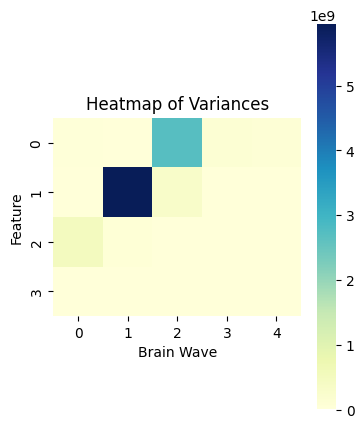

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'variances' is your DataFrame with shape (12,)
# Reshape it to (3, 4) while keeping the names
variances_reshaped = variances.values.reshape(4, 5)
variances_reshaped = pd.DataFrame(variances_reshaped) #, index=['Slope', 'STD', 'Avg Pow'], columns=['Theta', 'Delta', 'Beta', 'Alpha'])

# Create the heatmap
plt.figure(figsize=(4, 5))  # Adjust the figure size as needed
sns.heatmap(variances_reshaped, cmap="YlGnBu", square=True)

# Set labels and title
plt.xlabel("Brain Wave")
plt.ylabel("Feature")
plt.title("Heatmap of Variances")

# Show the plot
plt.show()


### **Split data into training/testing sets (70/30 Split)**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train

,CPC
20,1
57,1
16,0
0,0
5,0
24,0
26,0
6,0
21,0
19,1


### **Random Forest**

In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# Calculate precision
precision = precision_score(y_test, rf_predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, rf_predictions, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

importances = rf_model.feature_importances_
feature_names = list(X_train.columns)
feature_importances = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Printing the features with highest importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Accuracy: 0.42857142857142855
Precision: 0.42857142857142855
Recall: 0.42857142857142855
QRS Amp STD: 0.1180294086157559
Beta STD: 0.09715347406922933
Theta Slope: 0.07466810069870253
Beta Slope: 0.066146992483044
HRV STD: 0.0564185769456561
Beta Avg Pow: 0.05575619323266036
Alpha Slope: 0.05461571925053971
Theta Avg Pow: 0.05300029735743895
HR Avg: 0.047725210256001266
HRV Avg: 0.046443537333961914
Theta STD: 0.0463269311229253
QRS TI Avg: 0.04513460527221129
QRS Amp Avg: 0.04034038052836151
Delta Avg Pow: 0.040180421289099
HR STD: 0.03794534293342916
Avg Alpha Pow: 0.03355564130478891
Delta Slope: 0.030305476865979637
QRS TI STD: 0.023635584649964354
Delta STD: 0.01901663032049801
Alpha STD: 0.013601475469752782


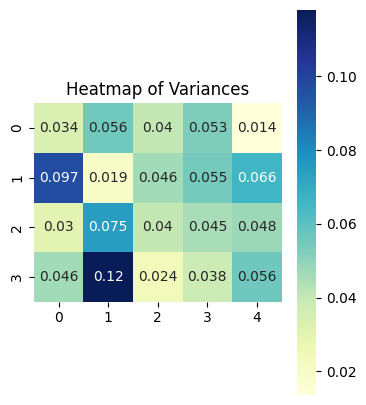

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'variances' is your DataFrame with shape (12,)
# Reshape it to (3, 4) while keeping the names
variances_reshaped = importances.reshape(4, 5)
variances_reshaped = pd.DataFrame(variances_reshaped) #, index=['Slope', 'STD', 'Avg Pow'], columns=['Theta', 'Delta', 'Beta', 'Alpha'])

# Create the heatmap
plt.figure(figsize=(4, 5))  # Adjust the figure size as needed
sns.heatmap(variances_reshaped, annot=True, cmap="YlGnBu", square=True)

# Set labels and title
plt.title("Heatmap of Variances")

# Show the plot
plt.show()

### **K-Means**

In [6]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X_train)
kmeans_predictions = kmeans_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, kmeans_predictions)

# Calculate precision
precision = precision_score(y_test, kmeans_predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, kmeans_predictions, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print(np.transpose(y_test.values) == kmeans_predictions)


Accuracy: 0.35714285714285715
Precision: 0.6428571428571429
Recall: 0.35714285714285715
[[False False False False False False  True  True  True False False False
   True  True]]


/home/mani/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mani/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Support Vector Machines**

In [7]:
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(X_train, y_train.values.ravel())
svm_predictions = svm_model.predict(X_test)

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)

# Calculate precision
precision = precision_score(y_test, svm_predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, svm_predictions, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5714285714285714
Precision: 0.5714285714285714
Recall: 0.5714285714285714


### **Plotting AUC**

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

y_score = rf_model.predict_proba(X_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
print(np.unique(y))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of CPC {0} (area = {1:0.2f})'.format(np.unique(y)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[0 1]


IndexError: index 1 is out of bounds for axis 1 with size 1